# Analysis of the energy-timer-series-data
Goal : gather insights from the OPSD dataset

Load and preprocess the 15-minutes dataset.

In [40]:
import numpy as np
import pandas as pd

UTC_TIMESTAMP = 'utc_timestamp'
LOAD_GERMANY = 'DE_load_actual_entsoe_transparency'
SOLAR_ENERGY_GENERATION_GERMANY = 'DE_solar_generation_actual'
WIND_ENERGY_GENERATION_GERMANY = 'DE_wind_generation_actual'

df_15min = pd.read_csv('..\\data\\opsd\\time_series_15min_singleindex.csv', parse_dates=[UTC_TIMESTAMP])

# Focus in this case only on german energy-data
GERMANY_PREFIX = 'DE'
germany_related_columns = []
for column_name in df_15min.columns.values:
    if GERMANY_PREFIX in column_name or UTC_TIMESTAMP == column_name:
        germany_related_columns.append(column_name)

reduced_df_15min = df_15min[germany_related_columns]

## Analyse the quality of the data

In [41]:
reduced_df_15min.describe()


,DE_load_actual_entsoe_transparency,DE_load_forecast_entsoe_transparency,DE_solar_capacity,DE_solar_generation_actual,DE_solar_profile,DE_wind_capacity,DE_wind_generation_actual,DE_wind_profile,DE_wind_offshore_capacity,DE_wind_offshore_generation_actual,...,DE_tennet_load_actual_entsoe_transparency,DE_tennet_load_forecast_entsoe_transparency,DE_tennet_solar_generation_actual,DE_tennet_wind_generation_actual,DE_tennet_wind_offshore_generation_actual,DE_tennet_wind_onshore_generation_actual,DE_transnetbw_load_actual_entsoe_transparency,DE_transnetbw_load_forecast_entsoe_transparency,DE_transnetbw_solar_generation_actual,DE_transnetbw_wind_onshore_generation_actual
count,201598.000000,201502.000000,175199.000000,201184.000000,174783.000000,175199.000000,201300.000000,174897.000000,175199.000000,201300.000000,...,201598.000000,201598.000000,201568.000000,201598.000000,201598.000000,201598.000000,201598.000000,201502.000000,201542.000000,201598.000000
mean,55492.589700,54791.506975,42378.044395,4566.134215,0.101903,39972.675592,11552.324213,0.278910,3261.038893,1970.485356,...,17184.771520,17220.759995,1692.775088,5725.266998,1715.398402,4009.868597,6960.477815,6950.370428,640.999928,248.046834
std,10041.148871,9523.623592,4306.349752,6964.591224,0.156266,7262.687183,9080.676730,0.211672,1359.166785,1569.613649,...,3240.566908,3141.736445,2607.162111,4368.888527,1404.739830,3280.661685,1546.034442,1552.783589,997.982893,291.586008
min,29158.120000,28675.410000,37248.000000,0.000000,0.000000,27913.000000,104.660000,0.003300,667.000000,0.000000,...,9471.550000,9589.350000,0.000000,12.510000,0.000000,0.000000,3445.730000,3394.000000,0.000000,0.000000
25%,47099.780000,46962.280000,38810.000000,0.000000,0.000000,33737.000000,4504.955000,0.114700,2219.000000,583.690000,...,14490.922500,14761.597500,0.000000,2088.972500,455.342500,1428.915000,5646.670000,5624.000000,0.000000,41.622500
50%,55117.400000,54749.695000,40941.000000,106.400000,0.001800,39808.000000,9009.805000,0.221100,3115.000000,1636.730000,...,17016.310000,17175.905000,31.310000,4673.570000,1421.840000,3100.080000,6822.970000,6817.080000,8.000000,132.195000
75%,64337.655000,62901.085000,46092.000000,7377.905000,0.163100,47730.000000,16126.362500,0.389500,4486.000000,3070.057500,...,19950.382500,19714.427500,2704.605000,8495.370000,2723.160000,5733.175000,8348.380000,8330.137500,988.000000,341.597500
max,77852.940000,76392.520000,50508.000000,33193.770000,0.690400,50452.000000,46205.630000,1.086200,5742.000000,6990.360000,...,24605.680000,25663.260000,12397.150000,20697.230000,6199.110000,15948.870000,11853.690000,11024.840000,4480.760000,1505.000000


In [42]:
import matplotlib.pyplot as plt
import matplotlib.dates as m_dates


def plot_time_series_data(time_stamps: np.ndarray, values: np.ndarray,
                          title: str, x_axis_label: str, y_axis_label: str) -> None:
    """
    Plots the given time-series-data.

    :param time_stamps: the x-axis values, are of the type datetime
    :param values: the y-axis values
    :param title: describes the diagram
    :param x_axis_label: describes the x-axis
    :param y_axis_label: describes the y-axis
    """
    fig, ax = plt.subplots(constrained_layout=True, figsize=(8, 5))
    locator = m_dates.AutoDateLocator(minticks=3, maxticks=7)
    formatter = m_dates.ConciseDateFormatter(locator)
    ax.xaxis.set_major_locator(locator)
    ax.xaxis.set_major_formatter(formatter)

    ax.plot(time_stamps, values)
    ax.set_xlim((time_stamps[0], time_stamps[len(time_stamps) - 1]))
    ax.set(xlabel=x_axis_label, ylabel=y_axis_label, title=title)

    plt.show()

---
## Analyse the load-data in Germany

### Display the long-term load-diagram for Germany

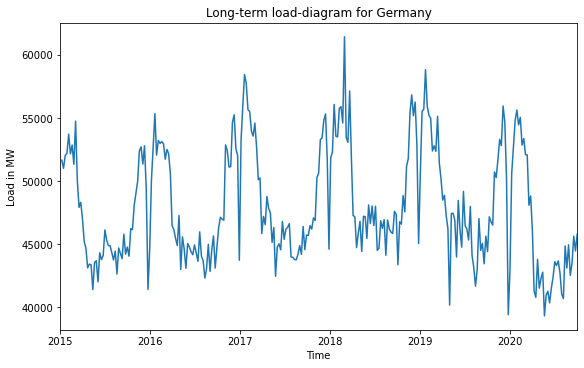

In [43]:
plot_time_series_data(
    np.array(reduced_df_15min[UTC_TIMESTAMP][::96 * 7]),
    np.array(reduced_df_15min[LOAD_GERMANY][::96 * 7]),
    'Long-term load-diagram for Germany',
    'Time',
    'Load in MW',
)

### Display a 1-year load-diagram for Germany

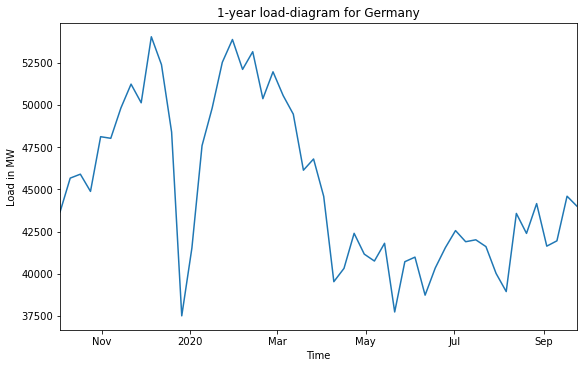

In [44]:
plot_time_series_data(
    np.array(reduced_df_15min[UTC_TIMESTAMP][-52 * 96 * 7::96 * 7]),
    np.array(reduced_df_15min[LOAD_GERMANY][-52 * 96 * 7::96 * 7]),
    '1-year load-diagram for Germany',
    'Time',
    'Load in MW',
)

### Display a weekly load-diagram for Germany

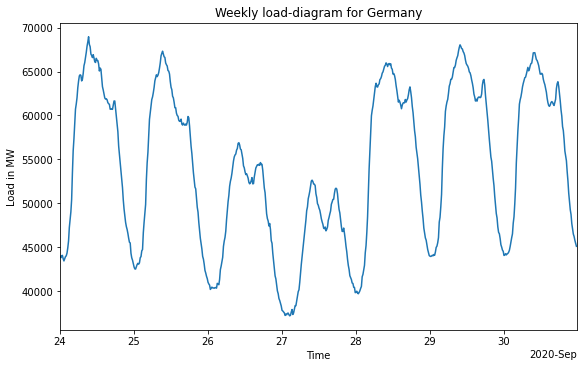

In [45]:
plot_time_series_data(
    np.array(reduced_df_15min[UTC_TIMESTAMP][-96 * 7:]),
    np.array(reduced_df_15min[LOAD_GERMANY][-96 * 7:]),
    'Weekly load-diagram for Germany',
    'Time',
    'Load in MW',
)

---
## Analyse the solar generation in Germany

### Display the long-term solar-energy-generation-diagram for Germany

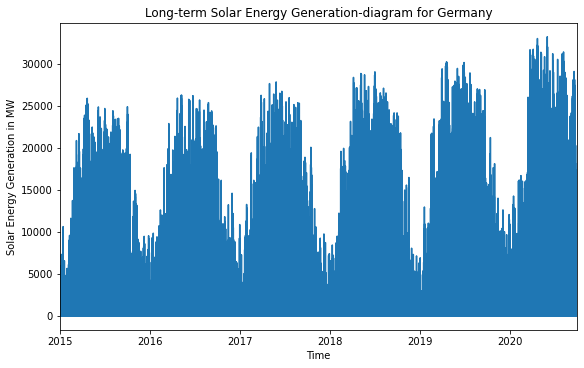

In [46]:
plot_time_series_data(
    np.array(reduced_df_15min[UTC_TIMESTAMP][::4]),
    np.array(reduced_df_15min[SOLAR_ENERGY_GENERATION_GERMANY][::4]),
    'Long-term Solar Energy Generation-diagram for Germany',
    'Time',
    'Solar Energy Generation in MW',
)

### Display a 1-year solar-energy-generation for Germany

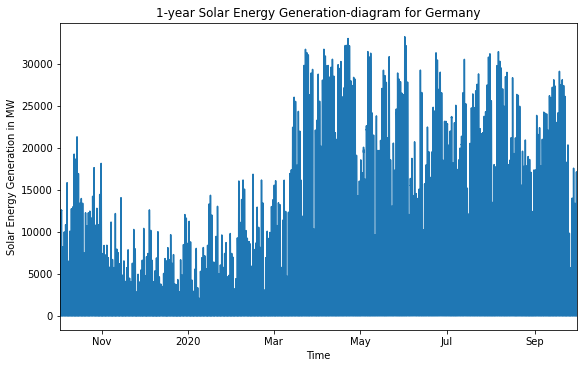

In [47]:
plot_time_series_data(
    np.array(reduced_df_15min[UTC_TIMESTAMP][-52 * 96 * 7 - 48::1]),
    np.array(reduced_df_15min[SOLAR_ENERGY_GENERATION_GERMANY][-52 * 96 * 7 - 48::1]),
    '1-year Solar Energy Generation-diagram for Germany',
    'Time',
    'Solar Energy Generation in MW',
)

### Display a weekly solar-energy-generation for Germany

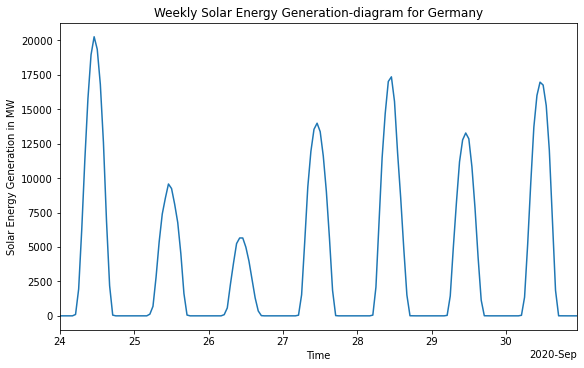

In [48]:
plot_time_series_data(
    np.array(reduced_df_15min[UTC_TIMESTAMP][-96 * 7::4]),
    np.array(reduced_df_15min[SOLAR_ENERGY_GENERATION_GERMANY][-96 * 7::4]),
    'Weekly Solar Energy Generation-diagram for Germany',
    'Time',
    'Solar Energy Generation in MW',
)

---
## Analyse the wind generation in Germany

### Display the long-term wind-energy-generation-diagram for Germany

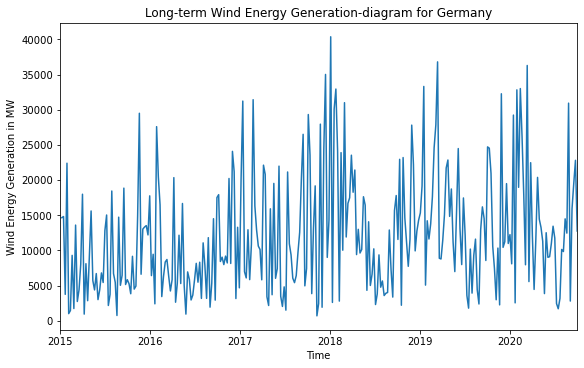

In [49]:
plot_time_series_data(
    np.array(reduced_df_15min[UTC_TIMESTAMP][::96 * 7]),
    np.array(reduced_df_15min[WIND_ENERGY_GENERATION_GERMANY][::96 * 7]),
    'Long-term Wind Energy Generation-diagram for Germany',
    'Time',
    'Wind Energy Generation in MW',
)

### Display a 1-year wind-energy-generation for Germany

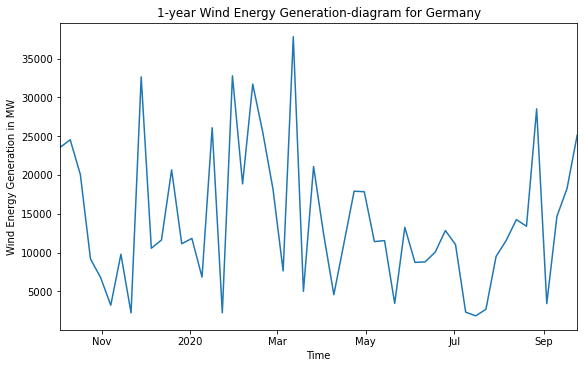

In [50]:
plot_time_series_data(
    np.array(reduced_df_15min[UTC_TIMESTAMP][-52 * 96 * 7::96 * 7]),
    np.array(reduced_df_15min[WIND_ENERGY_GENERATION_GERMANY][-52 * 96 * 7::96 * 7]),
    '1-year Wind Energy Generation-diagram for Germany',
    'Time',
    'Wind Energy Generation in MW',
)

### Display a monthly wind-energy-generation for Germany

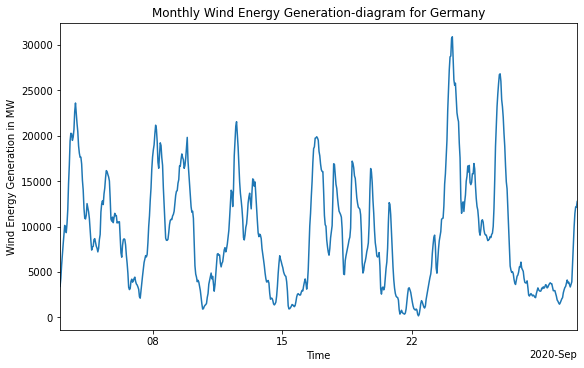

In [51]:
plot_time_series_data(
    np.array(reduced_df_15min[UTC_TIMESTAMP][-96 * 7 * 4::4]),
    np.array(reduced_df_15min[WIND_ENERGY_GENERATION_GERMANY][-96 * 7 * 4::4]),
    'Monthly Wind Energy Generation-diagram for Germany',
    'Time',
    'Wind Energy Generation in MW',
)
